In [264]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#set links to files (especially if files are elsewhere)
datalink = 'find_markers_list.csv' #this table can be downloaded from the pipeline
markerlink = 'markers_list.csv' #this table is prepared by the user

#load the data and check length
df = pd.read_table(datalink,sep=',',header=(0)) 
df.head()
len(df)

21900

In [265]:
#filter data based on adjusted p value and average logFC
df = df[df['p_val_adj'] < 0.05]
df = df[df['avg_log2FC'] > 0.5]

#print to see results
df

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,AKR1C1,5.630000e-75,1.154386,0.990,0.737,1.040000e-70,0,AKR1C1
1,RPL37,9.030000e-73,0.810477,0.992,0.991,1.660000e-68,0,RPL37
2,RPS27A,3.590000e-70,0.809497,0.992,0.983,6.620000e-66,0,RPS27A
3,MIR205HG,6.460000e-67,0.923464,0.885,0.481,1.190000e-62,0,MIR205HG
4,GSTM3,2.940000e-66,0.997510,0.969,0.641,5.420000e-62,0,GSTM3
...,...,...,...,...,...,...,...,...
21048,MAGED2.3,2.030000e-07,0.510992,0.426,0.190,3.730695e-03,15,MAGED2
21061,ARID5B.11,4.290000e-07,0.509396,0.639,0.364,7.905396e-03,15,ARID5B
21067,RABAC1.4,4.660000e-07,0.555078,0.508,0.260,8.582482e-03,15,RABAC1
21068,RHOA.6,4.760000e-07,0.544230,0.820,0.620,8.771785e-03,15,RHOA


In [266]:
# use 'groupby' function to calculate total number of significant 
# marker genes in each cluster

df1 = df.groupby('cluster').count()
df1.head()

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,gene
cluster,,,,,,,
0,96,96,96,96,96,96,96
1,118,118,118,118,118,118,118
2,168,168,168,168,168,168,168
3,135,135,135,135,135,135,135
4,354,354,354,354,354,354,354


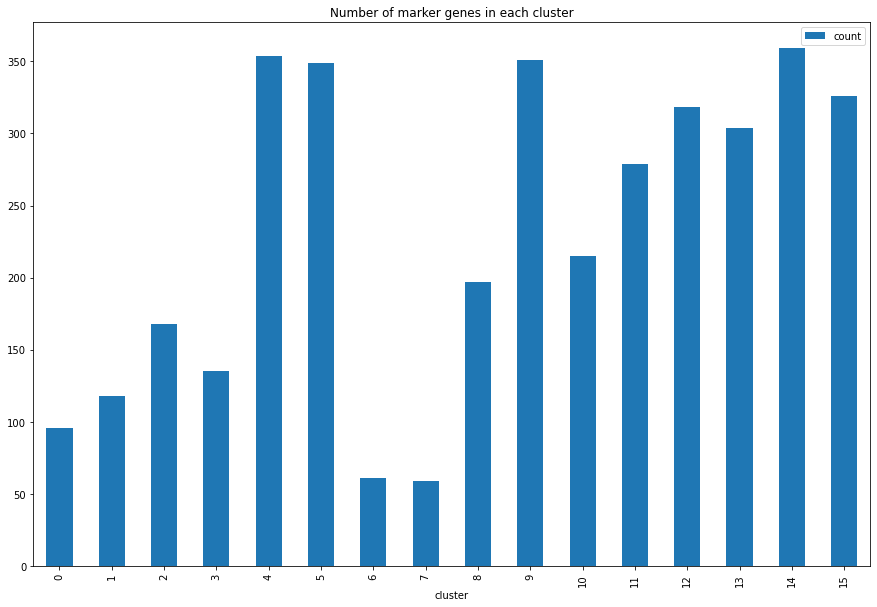

In [267]:
#let's summarize in a new dataframe
df2 = pd.DataFrame()
df2['count'] = df1['gene']

#plot summary
df2.plot.bar(title="Number of marker genes in each cluster", figsize = ( 15 , 10 ));

In [268]:
#load the prepared Cell Type marker table
marker_df = pd.read_table(markerlink,sep=',',header=(0)) 
marker_df.head()

,Cell Type,Marker 1,Marker 2,Marker 3,Marker 4
0,Endothelial cells,CLDN5,VWF,PECAM1,NaN
1,Epithelial cells,CAPS,SNTN,NaN,NaN
2,Alveolar cells,CLDN18,AQP4,FLOR1,NaN
3,Fibroblasts,COL1A1,COL1A2,DCN,NaN
4,T cells,CD2,CD3D,CD3E,CD3G


In [269]:
#create a "long" version, where each cell type has multiple marker genes
markers1 = pd.melt(marker_df, id_vars='Cell Type')

#remove "NaN" rows and an extra column 'Marker...' created by the "melt" function
markers1 = markers1[markers1['value'].notna()]
markers1 = markers1.drop(columns='variable')

#add a 'gene' column so that we can match with the source dataset
markers1['gene'] = markers1['value']

#print results
markers1

,Cell Type,value,gene
0,Endothelial cells,CLDN5,CLDN5
1,Epithelial cells,CAPS,CAPS
2,Alveolar cells,CLDN18,CLDN18
3,Fibroblasts,COL1A1,COL1A1
4,T cells,CD2,CD2
5,B cells,CD79A,CD79A
6,Myeloid cells,CD14,CD14
7,Neutrophils,CSF3R,CSF3R
8,Follicular dendritic cells,FDCSP,FDCSP
9,Mast cells,GATA2,GATA2


In [270]:
#add value for Cell Type (from mprepared markers) based on 'gene' column in the dataset
df = df.merge(markers1,on='gene',how="left")

#let's check results only for assigned Cell Types
df2 = df[df['value'].notna()]
df2

,gene_id,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,Cell Type,value
524,CD14.4,6.030000e-266,2.446469,0.942,0.132,1.110000e-261,4,CD14,Myeloid cells,CD14
894,CD14.5,2.280000e-149,1.595025,0.857,0.152,4.210000e-145,5,CD14,Myeloid cells,CD14
1221,CD2.3,1.090000e-207,1.589711,0.637,0.050,2.010000e-203,6,CD2,T cells,CD2
1289,CD79A,1.240000e-242,0.789941,0.446,0.007,2.290000e-238,7,CD79A,B cells,CD79A
2422,COL1A1.12,7.010000e-255,4.390486,1.000,0.076,1.290000e-250,12,COL1A1,Fibroblasts,COL1A1
2951,CD14.12,3.560000e-15,0.572043,0.575,0.195,6.560000e-11,13,CD14,Myeloid cells,CD14
3034,CLDN5,1.510000e-242,1.092839,0.431,0.002,2.790000e-238,14,CLDN5,Endothelial cells,CLDN5
3437,COL1A1.14,2.320000e-118,2.901691,1.000,0.094,4.280000e-114,15,COL1A1,Fibroblasts,COL1A1


In [271]:
#create a new dataframe that has all clusters with assigned names
max_clust = df.groupby('cluster', as_index=False).agg({'gene_id':'first','p_val':'first','avg_log2FC':max,'p_val_adj':'first','cluster':'first','Cell Type':'first'})
max_clust

,gene_id,p_val,avg_log2FC,p_val_adj,cluster,Cell Type
0,AKR1C1,5.630000e-75,1.154386,1.040000e-70,0,None
1,PERP.1,4.820000e-92,1.485352,8.880000e-88,1,None
2,BIRC5.2,2.020000e-159,1.831927,3.710000e-155,2,None
3,AKR1C1.3,4.340000e-71,1.215897,8.000000e-67,3,None
4,MS4A6A.4,0.000000e+00,3.536963,0.000000e+00,4,Myeloid cells
5,CTSL.5,6.550000e-197,3.083965,1.210000e-192,5,Myeloid cells
6,TRBC2,2.460000e-212,3.615573,4.540000e-208,6,T cells
7,JCHAIN,0.000000e+00,7.799011,0.000000e+00,7,B cells
8,SERPINB13,3.170000e-148,4.104140,5.840000e-144,8,None
9,SCEL.9,0.000000e+00,4.998280,0.000000e+00,9,None


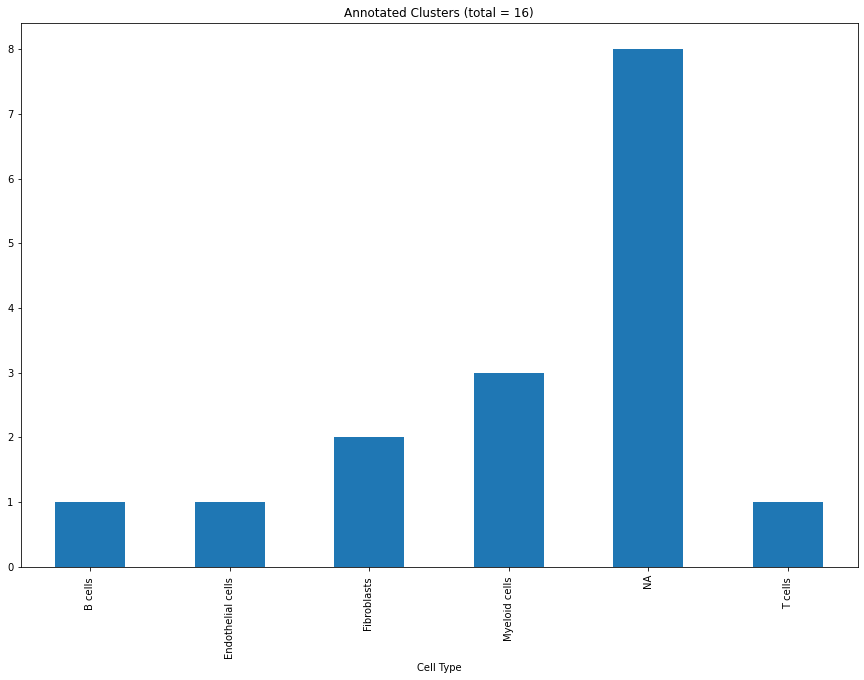

In [273]:
#replace 'None' with a cell type (cluster)
max_clust.replace([None], 'NA', inplace=True)

#plot summary
a = max_clust.groupby('Cell Type').count()
a['cluster'].plot.bar(title="Annotated Clusters (total = 16)", figsize = ( 15 , 10 ));

In [262]:
#replace 'None' with a cell type (cluster)
for i in range(0,len(max_clust)):
    if(max_clust.loc[max_clust.index[i],'Cell Type'] == 'NA'):
       max_clust.loc[max_clust.index[i],'Cell Type'] = max_clust.loc[max_clust.index[i],'cluster']
    
max_clust

,gene_id,p_val,avg_log2FC,p_val_adj,cluster,Cell Type
0,AKR1C1,5.630000e-75,1.154386,1.040000e-70,0,0
1,PERP.1,4.820000e-92,1.485352,8.880000e-88,1,1
2,BIRC5.2,2.020000e-159,1.831927,3.710000e-155,2,2
3,AKR1C1.3,4.340000e-71,1.215897,8.000000e-67,3,3
4,MS4A6A.4,0.000000e+00,3.536963,0.000000e+00,4,Myeloid cells
5,CTSL.5,6.550000e-197,3.083965,1.210000e-192,5,Myeloid cells
6,TRBC2,2.460000e-212,3.615573,4.540000e-208,6,T cells
7,JCHAIN,0.000000e+00,7.799011,0.000000e+00,7,B cells
8,SERPINB13,3.170000e-148,4.104140,5.840000e-144,8,8
9,SCEL.9,0.000000e+00,4.998280,0.000000e+00,9,9


In [196]:
#save results to a file
max_clust.to_csv('annotated_clusters.csv')